### load requred packages and pre-computed simulations and data-matched parameters

In [2]:
setwd('~/ResearchProjects/scRNA_simulation/')
library('devtools')
library('FNN')
library('reshape')
library('ggplot2')
library('gridExtra')
library('ape')
library('MASS')
load('allsim.20170706.robj')
load('match_params.robj')

### load package SCsim and set up plotting size in jupyter

In [8]:
load_all('SCsim')
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
ngenes=100

Loading SCsim


### Compute gene effects 

In [5]:
gene_effects <- GeneEffects(ngenes=ngenes,nevf=10,randseed=0,sd=1,prob=0.3)

# evf variation in a single population (Sigma)
## effect of sigma on the distribution of $k_{on}$, $k_{off}$ and $s$ for a random gene
### Change the value of sigma to see distribution changes 

Using  as id variables


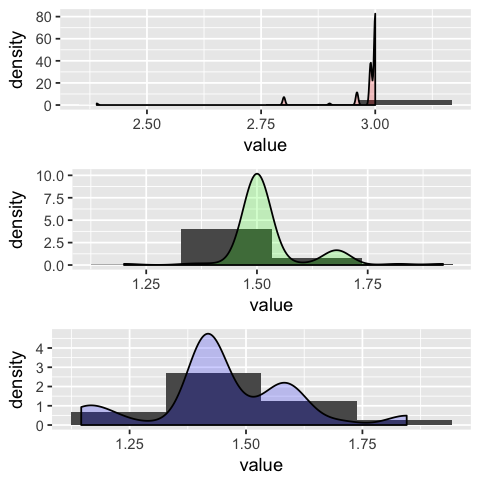

In [152]:
Sigma<-0.2
evf_mean<-rep(0,10)
evf_sd<-rep(Sigma,10)
evfs <- lapply(c(1:ncells),function(celli){
	evf <- sapply(c(1:length(evf_mean)),function(evfi){rnorm(1,evf_mean[evfi],evf_sd[evfi])})
	return(evf)
})
params<-lapply(c(1:ncells),function(i){Get_params(gene_effects,evfs[[i]],match_params1,0)})
param1<-do.call(rbind,lapply(params,function(X){X[1,]}))
PlotParamHist(param1,'temp')

## effect of sigma on the distribution of gene expression for all genes, visualized by the gene expression heatmap
### Change the value of sigma to see distribution changes
### The three plots correspond to 
* true counts
* sampled counts (sampled binomially with probability $\alpha$)
* biased counts (sampled binomially with probability $\alpha$, and added the gene and batch specific bias term $\lambda$)

   user  system elapsed 
 12.082   0.665  14.110 


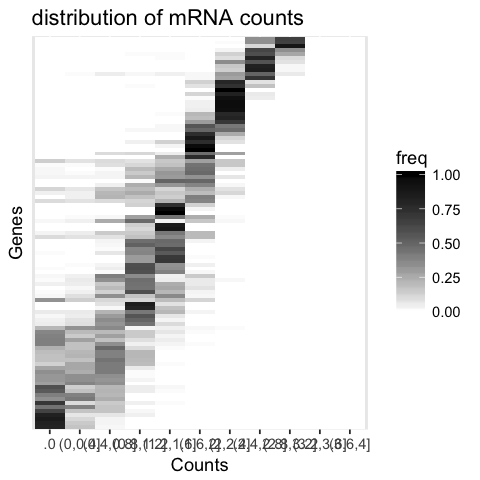

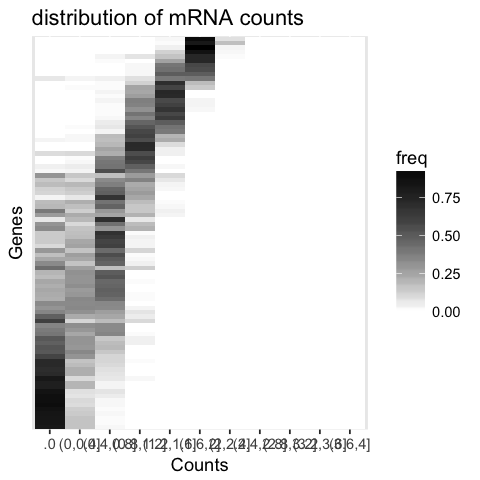

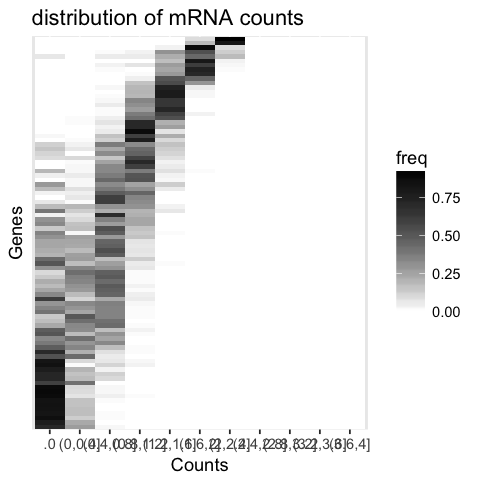

In [153]:
Sigma<-0.2
start <- proc.time()
temp<-sim1Pop1Batch(evf_mean=rep(1,nevf), evf_sd=rep(Sigma,nevf),ncells=ncells,
    randseed=randseed,gene_effects=gene_effects,bimod=0,alpha=0.1,
    alpha_sd=0.01,nbins=10,gcbias=0.5,lenbias=0.3,batch=exp(rnorm(ngenes,0,0.3)),noise=0.1,
    matched_params=match_params1)
print(proc.time()-start)
log_count_bins<-seq(0,4,0.4)
ord1<-PlotCountHeatmap(LogDist(temp[[2]],log_count_bins),rowMeans(temp[[2]]),NA,0.9,paste('truecounts.sigma=',Sigma,'.jpeg'))
ord2<-PlotCountHeatmap(LogDist(temp[[3]],log_count_bins),rowMeans(temp[[3]]),NA,0.9,paste('droppedcounts.sigma=',Sigma,'.jpeg'))
ord3<-PlotCountHeatmap(LogDist(temp[[4]],log_count_bins),rowMeans(temp[[4]]),NA,0.9,paste('biasedcounts.sigma=',Sigma,'.jpeg'))



## effect of sigma on the average fano factor
### fist simulate a dataset with different sigmas

In [23]:
change_sigma <- lapply(seq(0.1,1,0.3),function(Sigma){
    start <- proc.time()
	temp<-sim1Pop1Batch(evf_mean=rep(1,nevf), evf_sd=rep(Sigma,nevf),ncells=ncells,
			randseed=randseed,gene_effects=gene_effects,bimod=0,alpha=0.1,
			alpha_sd=0.01,nbins=10,gcbias=0.5,lenbias=0.3,batch=exp(rnorm(ngenes,0,0.3)),noise=0.1,
			matched_params=match_params1)
    print(proc.time()-start)
	return(temp)
})

   user  system elapsed 
 10.285   0.522  10.866 
   user  system elapsed 
 10.273   0.522  10.854 
   user  system elapsed 
 10.500   0.552  11.089 
   user  system elapsed 
 10.304   0.550  10.890 


### then plot box plot where y axis is the expression fano factor on log scale, and x axis is the sigma value used

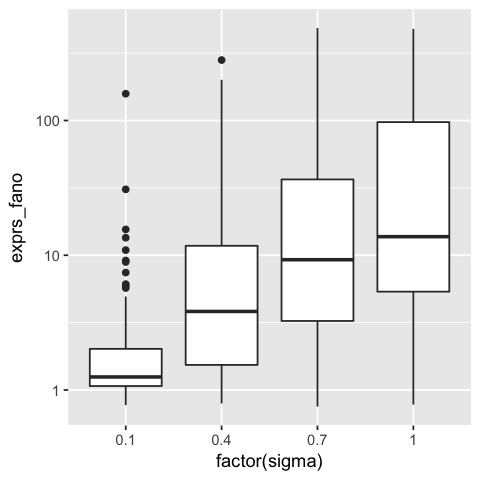

In [84]:
fano_compare <- lapply(change_sigma,function(X){apply((X[[2]]),1,function(Y){var(Y)/mean(Y)})})
fano_compare <- do.call(rbind,fano_compare)
rownames(fano_compare)<-seq(0.1,1,0.3)
df<-melt(fano_compare)
colnames(df)=c('sigma','rep','exprs_fano')
p <- ggplot(df, aes(x=factor(sigma), y=exprs_fano))
p <- p + geom_boxplot()+ scale_y_continuous(trans='log10')
print(p)

Using  as id variables


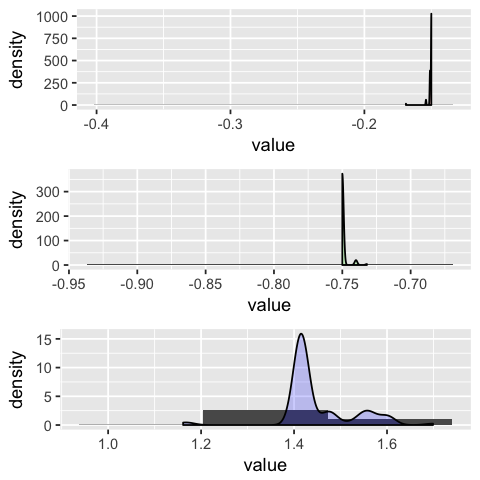

In [157]:
bimod <-0.9
evf_mean<-rep(0,10)
evf_sd<-rep(0.1,10)
evfs <- lapply(c(1:ncells),function(celli){
	evf <- sapply(c(1:length(evf_mean)),function(evfi){rnorm(1,evf_mean[evfi],evf_sd[evfi])})
	return(evf)
})

params<-lapply(c(1:ncells),function(i){Get_params(gene_effects,evfs[[i]],match_params1,bimod)})
param1<-do.call(rbind,lapply(params,function(X){X[1,]}))
PlotParamHist(param1,paste('beta=',bimod,'.1',sep=''))


# exactly the same plots and procedures but for varying $\beta$, or bimod, which represents the degree of bimodality in the stationary distribution of transcript counts of the same gene across different cells of the same population

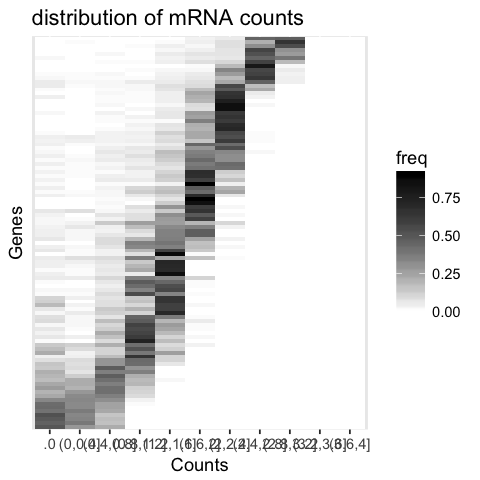

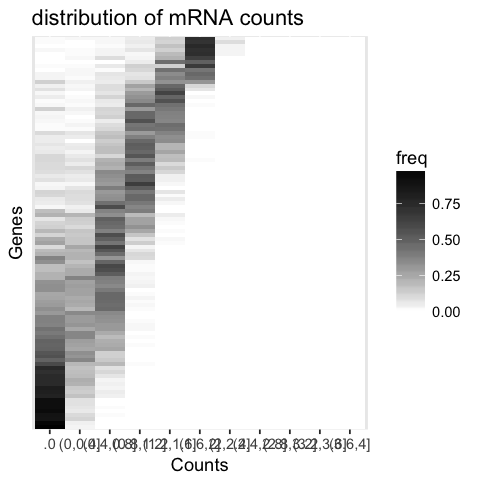

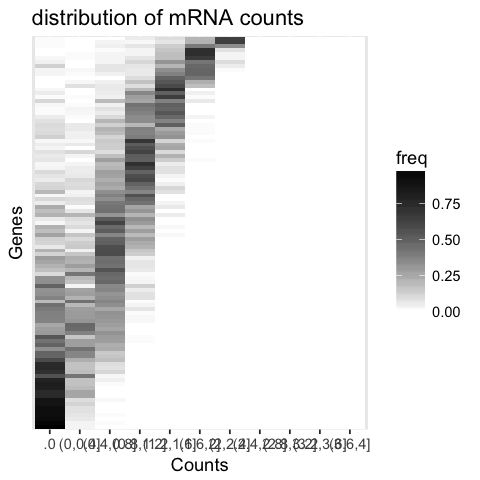

In [159]:
temp<-sim1Pop1Batch(evf_mean=rep(1,nevf), evf_sd=rep(0.2,nevf),ncells=ncells,
        randseed=randseed,gene_effects=gene_effects,bimod=bimod,alpha=0.1,
        alpha_sd=0.01,nbins=10,gcbias=0.5,lenbias=0.3,batch=exp(rnorm(ngenes,0,0.3)),noise=0.1,
        matched_params=match_params1)
log_count_bins<-seq(0,4,0.4)
ord1<-PlotCountHeatmap(LogDist(temp[[2]],log_count_bins),rowMeans(temp[[2]]),NA,1,paste('truecounts.bimod=',bimod,'.jpeg',sep=''))
ord2<-PlotCountHeatmap(LogDist(temp[[3]],log_count_bins),rowMeans(temp[[3]]),NA,1,paste('droppedcounts.bimod=',bimod,'.jpeg',sep=''))
ord3<-PlotCountHeatmap(LogDist(temp[[4]],log_count_bins),rowMeans(temp[[4]]),NA,1,paste('biasedcounts.bimod=',bimod,'.jpeg',sep=''))


In [160]:
change_bimod <- lapply(seq(0,1,0.1),function(bimod){
    start <- proc.time()
	temp<-sim1Pop1Batch(evf_mean=rep(1,nevf), evf_sd=rep(0.1,nevf),ncells=ncells,
			randseed=randseed,gene_effects=gene_effects,bimod=bimod,alpha=0.1,
			alpha_sd=0.01,nbins=10,gcbias=0.5,lenbias=0.3,batch=exp(rnorm(ngenes,0,0.3)),noise=0.1,
			matched_params=match_params1)
    print(proc.time()-start)
	return(temp)
})

   user  system elapsed 
 10.874   0.485  11.513 
   user  system elapsed 
 11.221   0.526  12.108 
   user  system elapsed 
 10.794   0.476  11.399 
   user  system elapsed 
 10.833   0.461  11.460 
   user  system elapsed 
 10.932   0.525  11.579 
   user  system elapsed 
 10.974   0.448  11.498 
   user  system elapsed 
 10.868   0.465  11.408 
   user  system elapsed 
 10.985   0.469  11.544 
   user  system elapsed 
 11.036   0.419  11.531 
   user  system elapsed 
 11.016   0.472  11.567 
   user  system elapsed 
 11.943   0.541  12.693 


Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

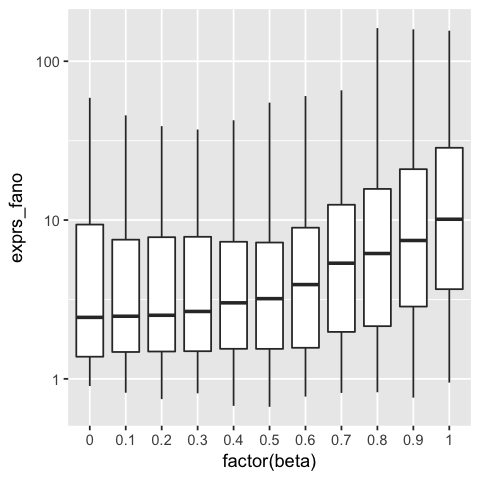

In [163]:
fano_compare <- lapply(change_bimod,function(X){apply((X[[2]]),1,function(Y){var(Y)/mean(Y)})})
fano_compare <- do.call(rbind,fano_compare)
rownames(fano_compare)<-seq(0,1,0.1)
df<-melt(fano_compare)
colnames(df)=c('beta','rep','exprs_fano')
p <- ggplot(df, aes(x=factor(beta), y=exprs_fano))
p <- p + geom_boxplot()+ scale_y_continuous(trans='log10')
p

# simulating discrete populations from tips of a tree
## fist simulate a tree, visualize the topology of the tree and the variance-covariance matrix that correspond to the distances in the tree

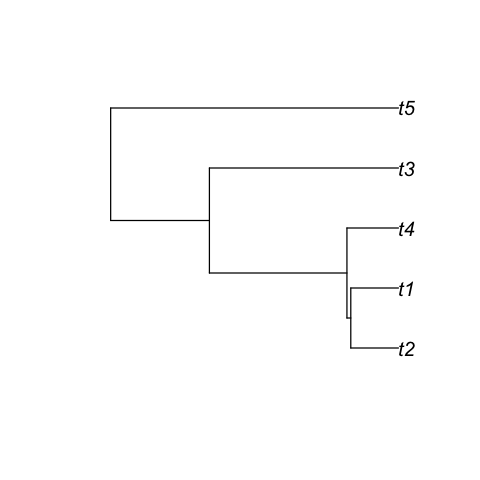

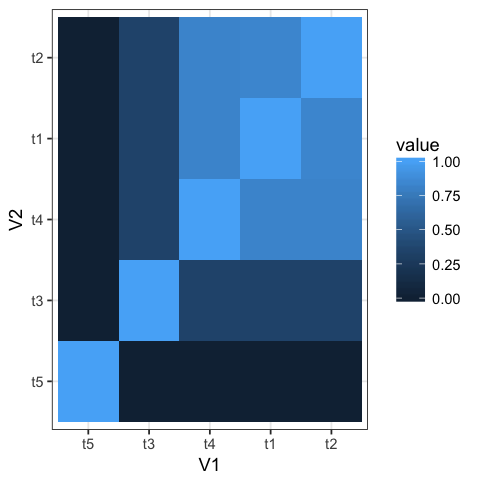

In [6]:
phyla<-rcoal(5)
plot(phyla)
cor_evf_mean<-vcv.phylo(phyla,cor=T)
varplot<-melt(cor_evf_mean)
varplot$V1<- factor( varplot$X1, levels = phyla$tip.label[order(cor_evf_mean[,1])])
varplot$V2<- factor( varplot$X2, levels = phyla$tip.label[order(cor_evf_mean[1,])])
ggplot(data=varplot,aes(x=V1, y=V2, fill=value)) + geom_tile() + theme_bw()

## now visualize if given the number of evfs and the tree structure, if the sampled evf_mean across populations still reflects the same structure

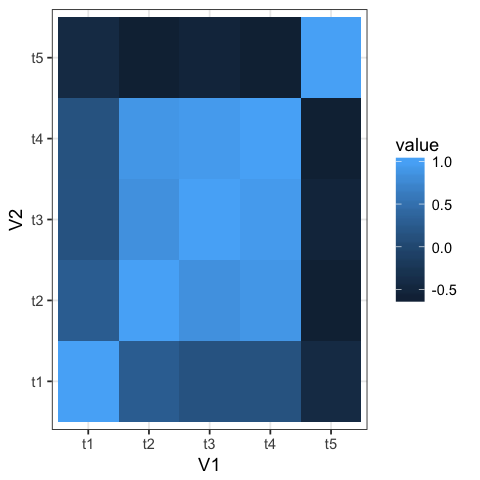

In [165]:
pop_evf_mean<-mvrnorm(nevf,rep(0,5),cor_evf_mean)
cor_evf_mean_exp <- cor(pop_evf_mean)
varplot<-melt(cor_evf_mean_exp)
varplot$V1<- factor( varplot$X1, levels = phyla$tip.label[order(cor_evf_mean[,1])])
varplot$V2<- factor( varplot$X2, levels = phyla$tip.label[order(cor_evf_mean[1,])])
ggplot(data=varplot,aes(x=V1, y=V2, fill=value)) + geom_tile() + theme_bw()

## Simulate a single batch but with multiple populations(tips of the tree with the sampled evf_mean), each represented by 50 cells

In [166]:
result <- Npop1Batch(phyla=phyla,nevf=10,
	evf_sd=0.1, ncells=rep(50,5),
	randseed=0,gene_effects=gene_effects,bimod=0,alpha=0.1,
	alpha_sd=0.05,nbins=10,gcbias=0.1,lenbias=0.1,batch=0.1, noise=0.1)

## Plot tSNE plot for 
* true counts
* sampled counts (sampled binomially with probability $\alpha$)
* biased counts (sampled binomially with probability $\alpha$, and added the gene and batch specific bias term $\lambda$)

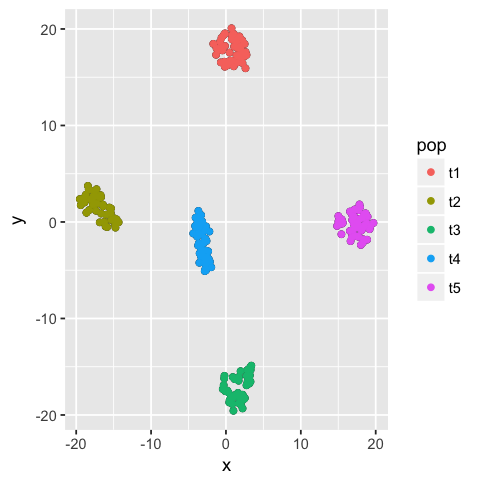

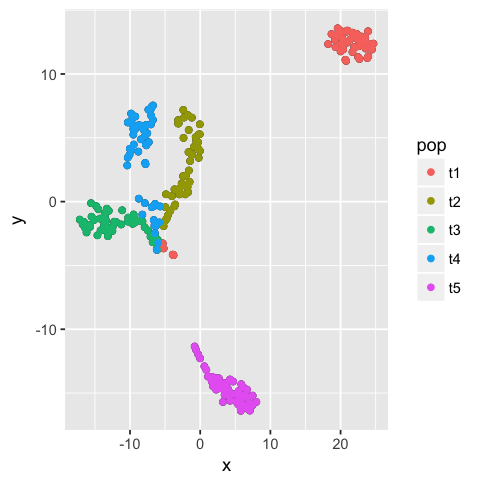

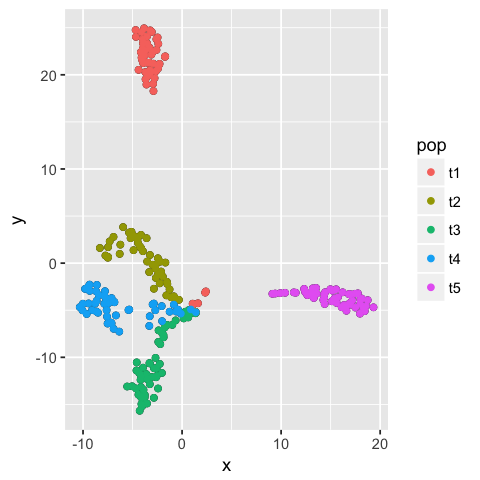

In [167]:
par(mfrow=c(1,3))
tsne <- PlotTsne(meta=result[[2]],data=result[[1]][[1]],label='pop',plotname='')
tsne <- PlotTsne(meta=result[[2]],data=result[[1]][[2]],label='pop',plotname='')
tsne <- PlotTsne(meta=result[[2]],data=result[[1]][[3]],label='pop',plotname='')

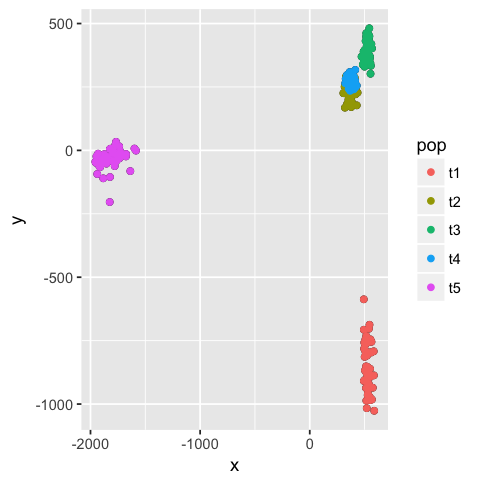

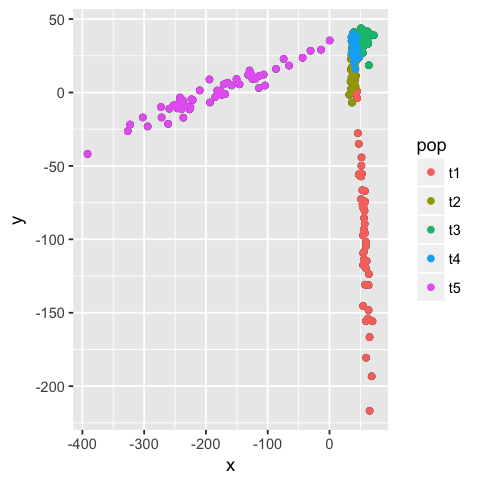

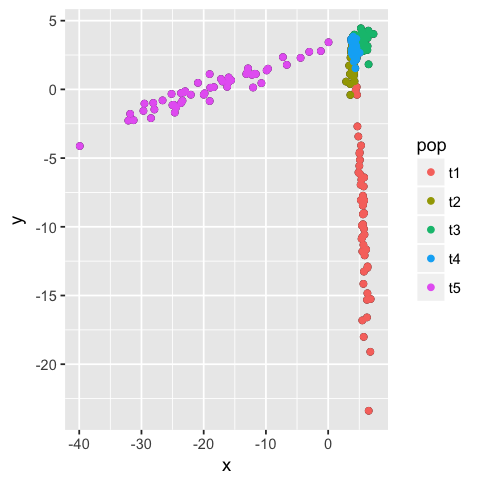

In [168]:
pca1 <- PlotPCA(meta=result[[2]],data=result[[1]][[1]],label='pop',plotname='')
pca1 <- PlotPCA(meta=result[[2]],data=result[[1]][[2]],label='pop',plotname='')
pca1 <- PlotPCA(meta=result[[2]],data=result[[1]][[3]],label='pop',plotname='')

## Simulate multiple batches but with multiple populations(tips of the tree with the sampled evf_mean), each represented by 50 cells

In [9]:
result2 <- NpopNBatch(phyla,nevf=10,nbatches=3,
	evf_sd=0.1,ncells=matrix(rep(10,15),nrow=3),
	randsee=0,gene_effects=gene_effects,bimod=0,alpha=rep(0.1,3),
	alpha_sd=rep(0.01,3),nbins=10,gcbias=rep(0.1,3),lenbias=rep(0.1,3),
	batch=rep(0.1,3),noise=rep(0.1,3))

### plot tSNE coloring by populations

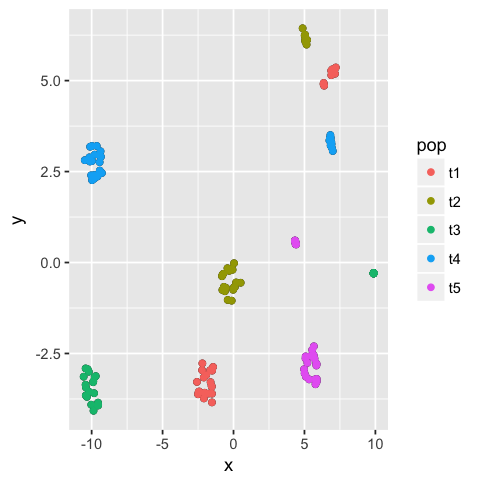

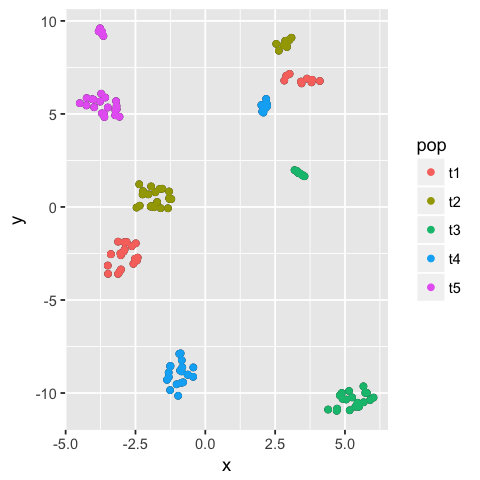

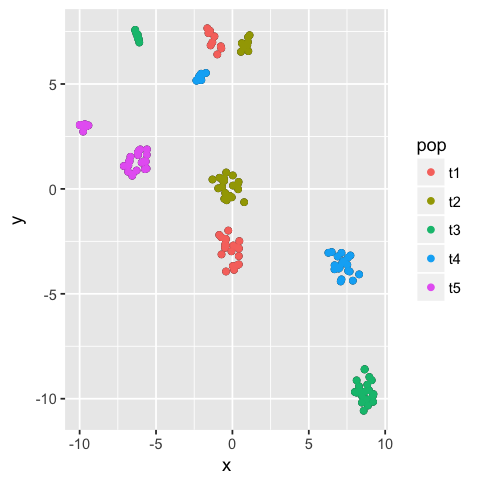

In [10]:
tsne <- PlotTsne(meta=result2[[2]],data=result2[[1]][[1]],label='pop',plotname='')
tsne <- PlotTsne(meta=result2[[2]],data=result2[[1]][[2]],label='pop',plotname='')
tsne <- PlotTsne(meta=result2[[2]],data=result2[[1]][[3]],label='pop',plotname='')


### plot tSNE and color by batch


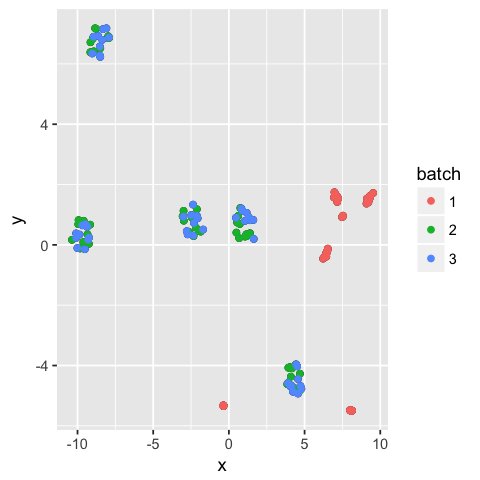

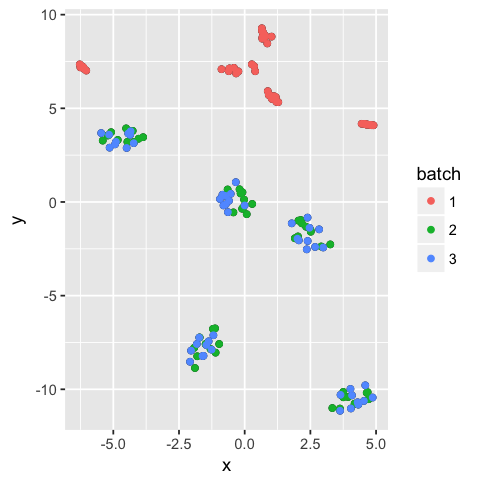

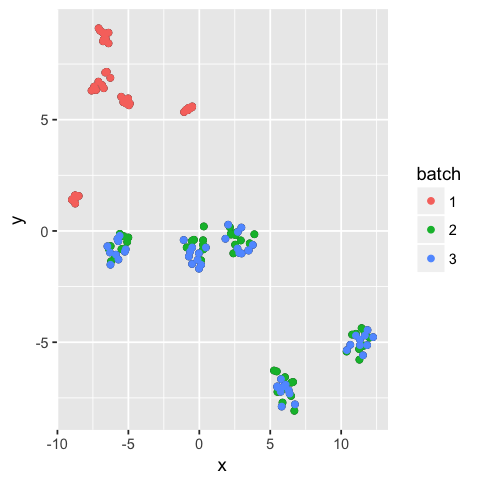

In [11]:
tsne <- PlotTsne(meta=result2[[2]],data=result2[[1]][[1]],label='batch',plotname='')
tsne <- PlotTsne(meta=result2[[2]],data=result2[[1]][[2]],label='batch',plotname='')
tsne <- PlotTsne(meta=result2[[2]],data=result2[[1]][[3]],label='batch',plotname='')

### plot PCA coloring by population identity

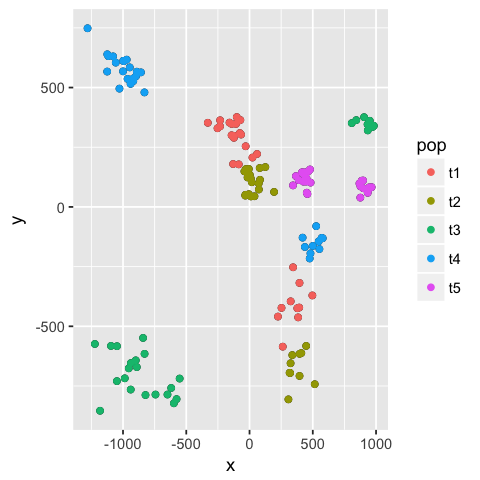

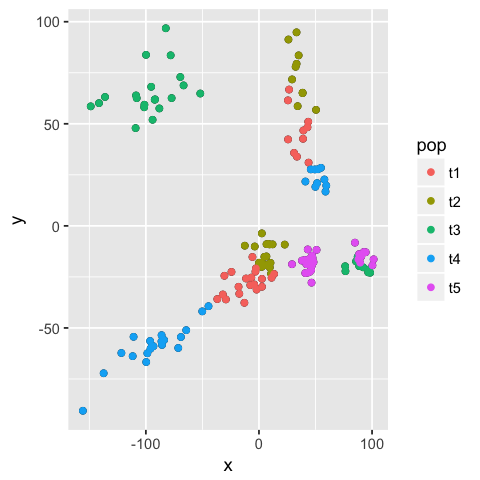

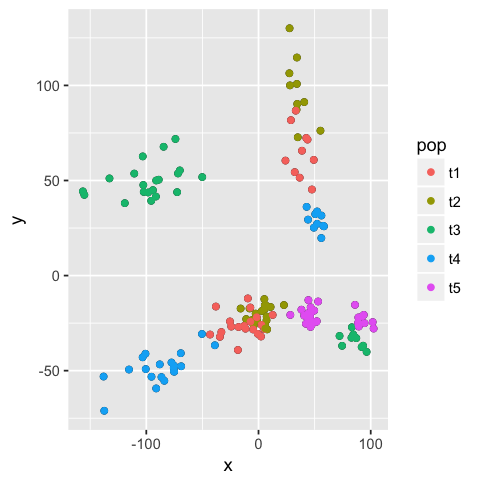

In [12]:
pca1 <- PlotPCA(meta=result2[[2]],data=result2[[1]][[1]],label='pop',plotname='')
pca1 <- PlotPCA(meta=result2[[2]],data=result2[[1]][[2]],label='pop',plotname='')
pca1 <- PlotPCA(meta=result2[[2]],data=result2[[1]][[3]],label='pop',plotname='')

### Plot PCA coloring by batch

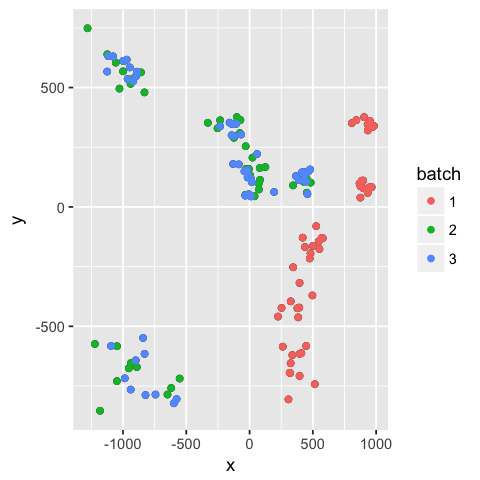

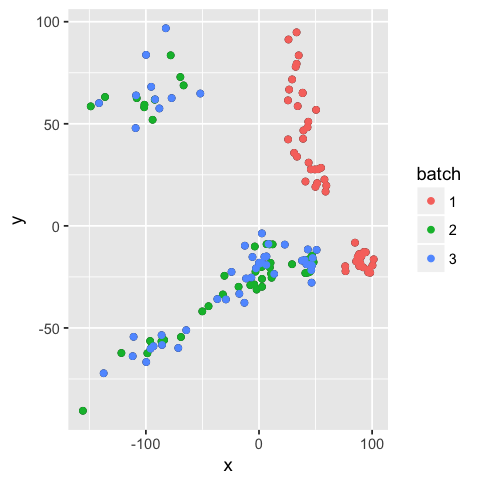

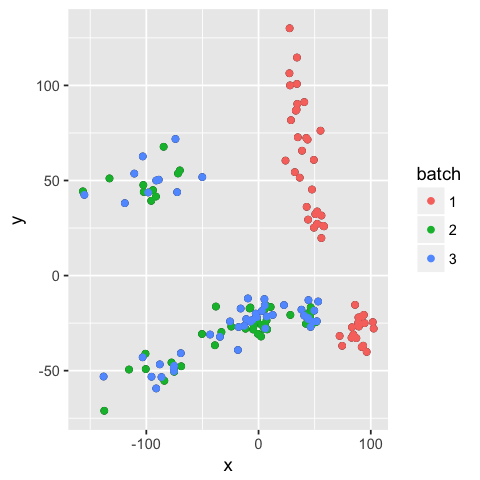

In [13]:
pca1 <- PlotPCA(meta=result2[[2]],data=result2[[1]][[1]],label='batch',plotname='')
pca1 <- PlotPCA(meta=result2[[2]],data=result2[[1]][[2]],label='batch',plotname='')
pca1 <- PlotPCA(meta=result2[[2]],data=result2[[1]][[3]],label='batch',plotname='')